# Game Sales Data Analysis

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering

In [20]:
df = pd.read_csv('H:/Code-Program/python/Data Analysis/Game Analysis/Games Sales.csv')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


## Assessing Data

In [21]:
print(df.shape)
print('total columns in the dataset = ',df.shape[1])
print('total rows in the dataset = ',df.shape[0])

(177, 7)
total columns in the dataset =  7
total rows in the dataset =  177


In [22]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [24]:
df.isnull().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [25]:
df.isna().sum()

Name          0
Sales         0
Series       36
Release       0
Genre         0
Developer     0
Publisher     0
dtype: int64

In [26]:
df.duplicated().sum()

2

In [27]:
df[df.duplicated(keep=False)]

,Name,Sales,Series,Release,Genre,Developer,Publisher
157,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
158,StarCraft II: Legacy of the Void,1.0,StarCraft,11/1/2015,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,11/1/2015,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [28]:
df.describe(include='all')

,Name,Sales,Series,Release,Genre,Developer,Publisher
count,177,177.000000,141,177,177,177,177
unique,175,NaN,91,130,61,109,96
top,StarCraft II: Heart of the Swarm,NaN,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Electronic Arts
freq,2,NaN,6,4,26,10,19
mean,NaN,3.116949,NaN,NaN,NaN,NaN,NaN
std,NaN,4.937466,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


## Cleaning Data

In [29]:
# drop data duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [30]:
# change datatype in release column to datetime
df['Release'] = pd.to_datetime(df['Release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


In [34]:
# drop NaN value in series column
df = df.dropna(subset=['Series'])
df.isna().sum()

Name         0
Sales        0
Series       0
Release      0
Genre        0
Developer    0
Publisher    0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 1 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       139 non-null    object        
 1   Sales      139 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    139 non-null    datetime64[ns]
 4   Genre      139 non-null    object        
 5   Developer  139 non-null    object        
 6   Publisher  139 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 8.7+ KB


In [36]:
df

,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,Valve (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt
...,...,...,...,...,...,...,...
169,Unreal Tournament,1.0,Unreal,1999-11-01,First-person shooter,Epic Games,GT Interactive
170,Vietcong,1.0,Vietcong,2003-03-01,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,2008-09-01,MMORPG,Mythic Entertainment,Electronic Arts
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,1994-12-01,Space combat simulation,Origin Systems,Electronic Arts


## Exploratory Data Analysis (EDA)

### 1. Which game is the oldest and the newest games in the dataset?

In [93]:
df.iloc[:,[0,3]]

,Name,Release
1,Minecraft,2011-11-01
2,Diablo III,2012-05-01
5,World of Warcraft,2004-11-01
6,Half-Life 2,2004-11-01
7,The Witcher 3: Wild Hunt,2015-05-01
...,...,...
169,Unreal Tournament,1999-11-01
170,Vietcong,2003-03-01
171,Warhammer Online: Age of Reckoning,2008-09-01
173,Wing Commander 3: Heart of the Tiger,1994-12-01


In [101]:
newest_game = df[['Name', 'Release']].sort_values(by='Release', ascending=False).head(5)
newest_game

,Name,Release
110,Crusader Kings III,2020-09-01
117,Divinity: Original Sin II,2017-09-01
94,Nier: Automata,2017-03-01
128,Hearts of Iron IV,2016-06-01
53,7 Days to Die,2016-06-01


In [102]:
oldest_game = df[['Name', 'Release']].sort_values(by='Release', ascending=True).head(5)
oldest_game

,Name,Release
133,Hydlide,1984-12-01
34,Where in the World Is Carmen Sandiego?,1985-06-01
88,International Karate,1985-11-01
162,Tetris,1988-01-01
22,Last Ninja 2,1988-08-01


Based on date of release column, the oldest game is Hydlide when it was released at 1984 while the newest game is Crusader Kings III when it was released at 2020

### 2. Which publisher published most of the games?

In [64]:
count_of_publisher = df.Publisher.value_counts().head(10)
count_of_publisher

Publisher
Electronic Arts            19
Blizzard Entertainment      8
Activision                  6
GT Interactive              5
Paradox Interactive         4
Microsoft                   4
Capcom                      4
Gathering of Developers     4
THQ                         3
Ubisoft                     2
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


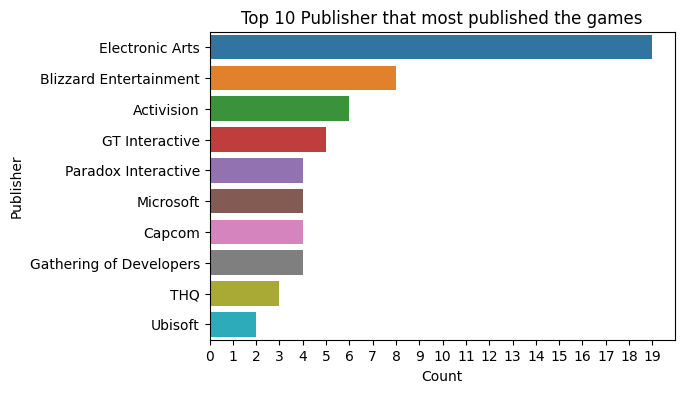

In [103]:
# data visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='Publisher', order=count_of_publisher.index)
plt.ylabel('Publisher')
plt.xlabel('Count')
plt.xticks(range(0,20))
plt.title('Top 10 Publisher that most published the games')
plt.show()

Based on the bar chart, the publisher that publishes the most game is Electronic Arts with 19 games

### 3. which developer developed most of the games?

In [73]:
count_of_dev = df.Developer.value_counts().head(10)
count_of_dev

Developer
Blizzard Entertainment        8
Maxis                         6
Valve                         4
Paradox Development Studio    4
id Software                   4
Capcom                        4
Ensemble Studios              4
Impressions Game              3
FromSoftware                  3
CD Projekt Red                3
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


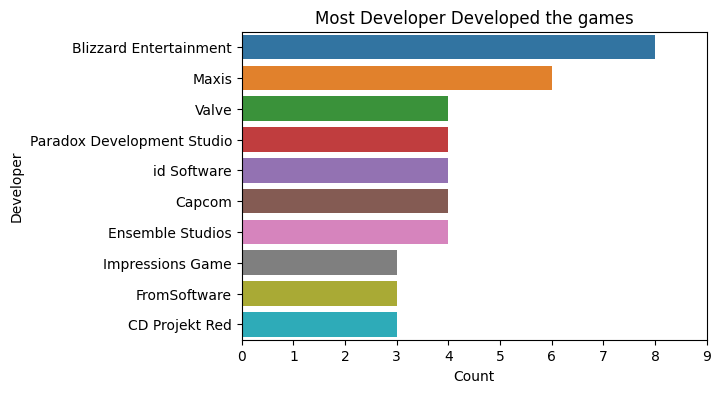

In [76]:
# data visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='Developer', order=count_of_dev.index)
plt.ylabel('Developer')
plt.xlabel('Count')
plt.xticks(range(0,10))
plt.title('Most Developer Developed the games')
plt.show()

Based on the bar chart, the developer that developes the most game is Blizzard Entertainment with 8 games

### 4. Which series has the most sales?

In [84]:
df.iloc[:,[1,2]]

,Sales,Series
1,33.0,Minecraft
2,20.0,Diablo
5,14.0,Warcraft
6,12.0,Half-Life
7,12.0,The Witcher
...,...,...
169,1.0,Unreal
170,1.0,Vietcong
171,1.0,Warhammer
173,1.0,Wing Commander


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


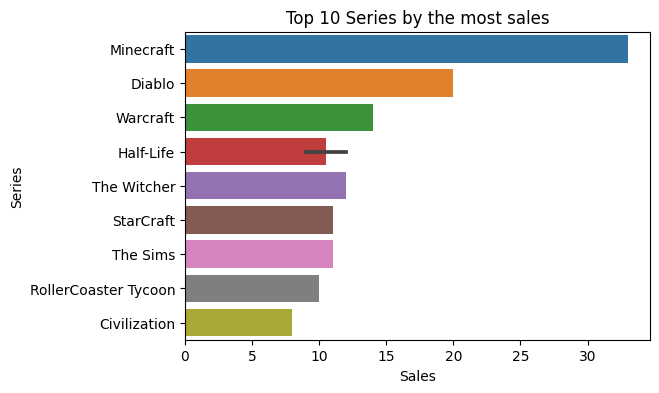

In [90]:
top_sales_series = df[['Sales', 'Series']].head(10)
top_sales_series = top_sales_series.sort_values(by='Sales', ascending=False)

# Data visualization
plt.figure(figsize=(6, 4))
sns.barplot(data=top_sales_series, x='Sales', y='Series')
plt.xlabel('Sales')
plt.ylabel('Series')
plt.title('Top 10 Series by the most sales')
plt.show()

Based on the bar chart, the most sales of series are 33 millions with Minecraft series name

### 5. Which series have the most games?

In [79]:
count_of_series = df.Series.value_counts().head(10)
count_of_series

Series
Command & Conquer    5
StarCraft            4
Civilization         4
Age of Empires       4
Warcraft             3
The Witcher          3
The Sims             3
Diablo               3
Dark Souls           3
Resident Evil        3
Name: count, dtype: int64

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


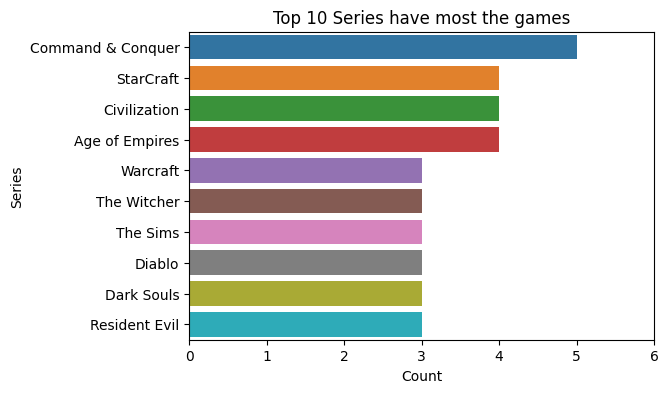

In [81]:
# data visualization
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='Series', order=count_of_series.index)
plt.ylabel('Series')
plt.xlabel('Count')
plt.xticks(range(0,7))
plt.title('Top 10 Series have most the games')
plt.show()

Based on the bar chart, the series that has the most game is Command and Conquer with 5 games